# Data Vizualisation et présentation des données
Les données que j'ai choisi portent sur les prix de l'immobilier en tant que time series avec les variables explicatives suivantes :
- le code postale
- le nombre de chambres
- Une maison ou un appartement (que j'ai modifié en 0 ou 1 dans le code ci-dessous)
- la date

Le but étant de prédire la varaible expliquée : le prix.

On peut visualiser ci-dessous notre dataset qui varie de 2007 (début de la crise immoblière) à 2019.<br>
Chaque histogramme représente la répartition des prix dans un mois.<br>
Par exemple, en octobre 2015 on se rend compte que le prix des maisons à varier jusqu'à + de $2m ! <br>
Egalement, on se rend compte à travers cette visualisation qu'il y a des valeurs abérantes qui seront ammenées à être corrigées.

Warning message:
“Use of `dtf$Month` is discouraged. Use `Month` instead.”

Warning message:
“Use of `dtf$MyData.price` is discouraged. Use `MyData.price` instead.”

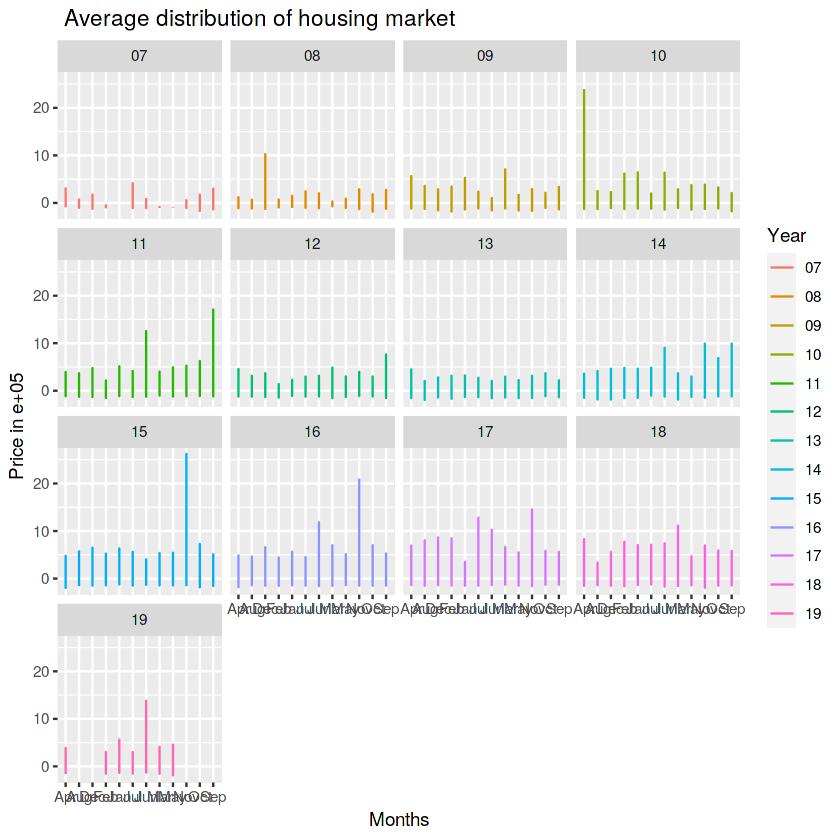

In [24]:
# Title     : Project ML ING3
# Objective : Question 1 et data viz
# Created by: Ouhib yann
# Created on: 24/03/2020
# Data imported from https://www.kaggle.com/deltacrot/property-sales
library(ggplot2)
library(scales)
library(leaps)
library(MASS)
library(zoo)
library(lmtest)


# Getting the data from csv, converting date, puting it all in df for easier manipulation
# MyData <- read.csv2("raw_sales.csv", header = TRUE)
MyData <- read.csv2("raw_sales.csv", header = TRUE)
newDate <- as.Date(MyData$datesold, format = "%d/%m/%Y")
dtf <- data.frame(newDate, MyData$postcode, MyData$propertyType, MyData$bedrooms ,MyData$price)

dtf$Year <- format(dtf$newDate, "%y")
dtf$Month <- format(dtf$newDate, "%b")
dtf$Day <- format(dtf$newDate, "%d")

dtf$MyData.propertyType <- replace(as.character(dtf$MyData.propertyType), dtf$MyData.propertyType == "house", 1) # If it's a house, equals 1
dtf$MyData.propertyType <- replace(as.character(dtf$MyData.propertyType), dtf$MyData.propertyType == "unit", 0) # If it's an unit, equals 0


ggplot(data = dtf, aes(x = dtf$Month, y =  scale(dtf$MyData.price), col = Year)) +  geom_line() + facet_wrap(~ dtf$Year) + ggtitle(" Average distribution of housing market") + ylab("Price in e+05") + xlab("Months")
# matplot(dtf$Year, dtf$MyData.price, type = "l", xlab = "dates", ylab = "house price") + scale_x_discrete()

# Gestion des outliers

Les outliers ont été supprimés ici en suivant la méthode des écarts inter-quartiles.<br>
J'ai au début voulu partir sur un interval de confiance mais la nature des données fait que cette méthode est parfois trop discriminante.<br>
On a ensuite le calcul de l'espérance, la médianne, l'écart-type ainsi que le min et max de la série APRES suppression des outliers.

In [9]:
# Title     : Project ML ING3
# Objective : Question 2
# Created by: Ouhib yann
# Created on: 24/03/2020
# Data imported from https://www.kaggle.com/deltacrot/property-sales



# Removing outliers based on interquartiles range
mu <- mean(dtf$MyData.price)
sigma <- sqrt(sd(dtf$MyData.price))
n <- nrow(dtf)
q1 <- quantile(dtf$MyData.price, c(0.25))
q3 <- quantile(dtf$MyData.price, c(0.75))
born_Inf <- 0.5*q1
born_Sup <- 1.5*q3

df_cleaned <- subset(dtf, dtf$MyData.price > born_Inf & dtf$MyData.price < born_Sup)


# stats of cleaned dtf
clean_mean <- mean(df_cleaned$MyData.price)
clean_median <- median(df_cleaned$MyData.price)
clean_Max <- max(df_cleaned$MyData.price)
clean_Min <- min(df_cleaned$MyData.price)


cat("\nMean = ", clean_mean )
cat("\nMedian = ", clean_median)
cat("\nHighest price = ", clean_Max)
cat("\nLowest price = ", clean_Min)


# Correlations all related to price
cat("\n\nRcodepost-price = ", cor(df_cleaned$MyData.postcode, df_cleaned$MyData.price))
cat("\nRpropertyType-price = ", cor(as.numeric(df_cleaned$MyData.propertyType), df_cleaned$MyData.price))
cat("\nRbedrooms-price = ", cor(df_cleaned$MyData.bedrooms, df_cleaned$MyData.price))

# Correlations related to bedrooms
cat("\nRpostcode-bedrooms = ", cor(df_cleaned$MyData.bedrooms, df_cleaned$MyData.postcode))
cat("\nRproperty-bedrooms = ", cor(df_cleaned$MyData.bedrooms, as.numeric(df_cleaned$MyData.propertyType)))

# Correlation related to postcode and property
cat("\nRpostcode-property = ", cor(df_cleaned$MyData.postcode, as.numeric(df_cleaned$MyData.propertyType)))




Mean =  565544.9


Median =  540000


Highest price =  1056000


Lowest price =  221000



Rcodepost-price =  -0.07051372


RpropertyType-price =  0.3945655


Rbedrooms-price =  0.5852167


Rpostcode-bedrooms =  0.2619391


Rproperty-bedrooms =  0.6770023


Rpostcode-property =  0.276096

# Regression multilinéaire et maximum de vraissemblance
Dans ce qui suit, on a utilisé la fonction "lm()" déjà implémenté sous R afin d'effectuer une régression multi-linéaire sur les différents Xi de notre dataset.<br>
En suite, l'utilisation du maximum de vraissemblance nous permet de comparer les 2 méthodes (à savoir que la focntion "lm()" se base sur la méthode des moindres carrés ordinaires).<br>
J'ai préféré afficher le summary des 2 méthodes plutôt qu'un "all equals" pas forcément adapté.

In [12]:
# Title     : Project ML ING3
# Objective : Question 3 et 4
# Created by: Ouhib yann
# Created on: 01/04/2020
# Data imported from https://www.kaggle.com/deltacrot/property-sales


# Mutliple linear regression
multi.fit <- lm(df_cleaned$MyData.price ~ df_cleaned$MyData.bedrooms + df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, data = df_cleaned)
print(multi.fit)

# lm is an ordinary least square, so let's do max likelyhood - gml - on price
maxLikeHood <- glm(df_cleaned$MyData.price ~ df_cleaned$MyData.bedrooms + df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, data = df_cleaned)
print(maxLikeHood)

# all.equal(multi.fit, maxLikeHood)




Call:
lm(formula = df_cleaned$MyData.price ~ df_cleaned$MyData.bedrooms + 
    df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, 
    data = df_cleaned)

Coefficients:
                    (Intercept)       df_cleaned$MyData.bedrooms  
                      305148.25                        113480.71  
     df_cleaned$MyData.postcode               df_cleaned$newDate  
                        -288.63                            39.91  
df_cleaned$MyData.propertyType1  
                       34400.78  




Call:  glm(formula = df_cleaned$MyData.price ~ df_cleaned$MyData.bedrooms + 
    df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, 
    data = df_cleaned)

Coefficients:
                    (Intercept)       df_cleaned$MyData.bedrooms  
                      305148.25                        113480.71  
     df_cleaned$MyData.postcode               df_cleaned$newDate  
                        -288.63                            39.91  
df_cleaned$MyData.propertyType1  
                       34400.78  

Degrees of Freedom: 27863 Total (i.e. Null);  27859 Residual
Null Deviance:	    8.137e+14 
Residual Deviance: 4.394e+14 	AIC: 733400


# Optimisation du modèle retenu

Dans la cellule ci-dessous, j'ai choisi d'afficher le résultat des modèles pour les 3 types de regressions pas à pas (forward, backward, stepwise) afin de les comparer.<br>
Il convient de noter que le modèle prend 4 type de paramètres explicatifs qui sont ceux présentez au début du projet (date, nombre de chambres, code postale, maison//appartement).<br>
Explicons comment fonctionne les modèles :
* (1) corespond en fait à un modèle avec 1 seule variable explicative retenue (la variable retenue est celle dont la colonne est rempli par un '*')
* (2) corespond à un modèle avec 2 variables explicatives retenues (toujours notées par un '*')
etc.


In [13]:
# Title     : Project ML ING3
# Objective : Question 5 et 6
# Created by: OUHIB Yann
# Created on: 16/04/2020
# Data imported from https://www.kaggle.com/deltacrot/property-sales


modBack <- regsubsets(df_cleaned$MyData.price~ df_cleaned$MyData.bedrooms + df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, data = df_cleaned, nvmax = 4, method = "backward") # backward regression
modForw <- regsubsets(df_cleaned$MyData.price~ df_cleaned$MyData.bedrooms + df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, data = df_cleaned, nvmax = 4, method = "forward") # forward regression
modStep <- regsubsets(df_cleaned$MyData.price~ df_cleaned$MyData.bedrooms + df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, data = df_cleaned, nvmax = 4, method = "seqrep") # stepwise

summary(modBack)
summary(modForw)
summary(modStep)



Subset selection object
Call: regsubsets.formula(df_cleaned$MyData.price ~ df_cleaned$MyData.bedrooms + 
    df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, 
    data = df_cleaned, nvmax = 4, method = "backward")
4 Variables  (and intercept)
                                Forced in Forced out
df_cleaned$MyData.bedrooms          FALSE      FALSE
df_cleaned$MyData.postcode          FALSE      FALSE
df_cleaned$newDate                  FALSE      FALSE
df_cleaned$MyData.propertyType1     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: backward
         df_cleaned$MyData.bedrooms df_cleaned$MyData.postcode
1  ( 1 ) "*"                        " "                       
2  ( 1 ) "*"                        " "                       
3  ( 1 ) "*"                        "*"                       
4  ( 1 ) "*"                        "*"                       
         df_cleaned$newDate df_cleaned$MyData.propertyType1
1  ( 1 ) " "           

Subset selection object
Call: regsubsets.formula(df_cleaned$MyData.price ~ df_cleaned$MyData.bedrooms + 
    df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, 
    data = df_cleaned, nvmax = 4, method = "forward")
4 Variables  (and intercept)
                                Forced in Forced out
df_cleaned$MyData.bedrooms          FALSE      FALSE
df_cleaned$MyData.postcode          FALSE      FALSE
df_cleaned$newDate                  FALSE      FALSE
df_cleaned$MyData.propertyType1     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: forward
         df_cleaned$MyData.bedrooms df_cleaned$MyData.postcode
1  ( 1 ) "*"                        " "                       
2  ( 1 ) "*"                        " "                       
3  ( 1 ) "*"                        "*"                       
4  ( 1 ) "*"                        "*"                       
         df_cleaned$newDate df_cleaned$MyData.propertyType1
1  ( 1 ) " "             

Subset selection object
Call: regsubsets.formula(df_cleaned$MyData.price ~ df_cleaned$MyData.bedrooms + 
    df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, 
    data = df_cleaned, nvmax = 4, method = "seqrep")
4 Variables  (and intercept)
                                Forced in Forced out
df_cleaned$MyData.bedrooms          FALSE      FALSE
df_cleaned$MyData.postcode          FALSE      FALSE
df_cleaned$newDate                  FALSE      FALSE
df_cleaned$MyData.propertyType1     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: 'sequential replacement'
         df_cleaned$MyData.bedrooms df_cleaned$MyData.postcode
1  ( 1 ) "*"                        " "                       
2  ( 1 ) "*"                        " "                       
3  ( 1 ) "*"                        "*"                       
4  ( 1 ) "*"                        "*"                       
         df_cleaned$newDate df_cleaned$MyData.propertyType1
1  ( 1 ) 

In [22]:
# Title     : TODO
# Objective : TODO
# Created by: moi
# Created on: 17/04/2020


#modBack <- stepAIC(multi.fit, trace = TRUE, direction = "backward") # backward regression
#modForw <- stepAIC(multi.fit, trace = TRUE, direction = "forward") # forward regression
modStep <- stepAIC(multi.fit, trace = TRUE, direction = "both")  # stepwise regression

print(modStep)


# Used to test the adequation to a normal distribution - Saphiro-Wilk distrib.
#test_SW <- shapiro.test(modStep)
#print(test_SW)

# Used to test autocorrelation -  Durbin Watson test.
test_DW <- dwtest(modStep)
print(test_DW)

# determination coefficient - used in the context of prediction of future outcomes.
cat("\nCoefficient de détermination = ", summary(modStep)$r.squared)

Start:  AIC=654296.9
df_cleaned$MyData.price ~ df_cleaned$MyData.bedrooms + df_cleaned$MyData.postcode + 
    df_cleaned$newDate + df_cleaned$MyData.propertyType



                                 Df  Sum of Sq        RSS    AIC
<none>                                         4.3944e+14 654297
- df_cleaned$MyData.propertyType  1 2.5014e+12 4.4195e+14 654453
- df_cleaned$MyData.postcode      1 4.6127e+13 4.8557e+14 657076
- df_cleaned$newDate              1 5.1063e+13 4.9051e+14 657358
- df_cleaned$MyData.bedrooms      1 1.6715e+14 6.0660e+14 663277



Call:
lm(formula = df_cleaned$MyData.price ~ df_cleaned$MyData.bedrooms + 
    df_cleaned$MyData.postcode + df_cleaned$newDate + df_cleaned$MyData.propertyType, 
    data = df_cleaned)

Coefficients:
                    (Intercept)       df_cleaned$MyData.bedrooms  
                      305148.25                        113480.71  
     df_cleaned$MyData.postcode               df_cleaned$newDate  
                        -288.63                            39.91  
df_cleaned$MyData.propertyType1  
                       34400.78  




	Durbin-Watson test

data:  modStep
DW = 1.4215, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0




Coefficient de détermination =  0.459932